# Iris Flowers Classification

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("iris.data")

In [4]:
df.shape

(149, 5)

In [5]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [9]:
df.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        5.1    3.5    1.4    0.2  Iris-setosa
0    False  False  False  False        False
1    False  False  False  False        False
2    False  False  False  False        False
3    False  False  False  False        False
4    False  False  False  False        False
..     ...    ...    ...    ...          ...
144  False  False  False  False        False
145  False  False  False  False        False
146  False  False  False  False        False
147  False  False  False  False        False
148  False  False  False  False        False

[149 rows x 5 columns]>

In [11]:
df.value_counts()

5.1  3.5  1.4  0.2  Iris-setosa    
4.9  3.1  1.5  0.1  Iris-setosa        3
5.8  2.7  5.1  1.9  Iris-virginica     2
6.2  3.4  5.4  2.3  Iris-virginica     1
6.3  2.3  4.4  1.3  Iris-versicolor    1
     2.5  4.9  1.5  Iris-versicolor    1
                                      ..
5.5  2.4  3.7  1.0  Iris-versicolor    1
          3.8  1.1  Iris-versicolor    1
     2.5  4.0  1.3  Iris-versicolor    1
     2.6  4.4  1.2  Iris-versicolor    1
7.9  3.8  6.4  2.0  Iris-virginica     1
Length: 146, dtype: int64

In [13]:
df["0.2"].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [14]:
df.groupby("0.2").size()

0.2
0.1     6
0.2    27
0.3     7
0.4     7
0.5     1
0.6     1
1.0     7
1.1     3
1.2     5
1.3    13
1.4     8
1.5    12
1.6     4
1.7     2
1.8    12
1.9     5
2.0     6
2.1     6
2.2     3
2.3     8
2.4     3
2.5     3
dtype: int64

<AxesSubplot:>

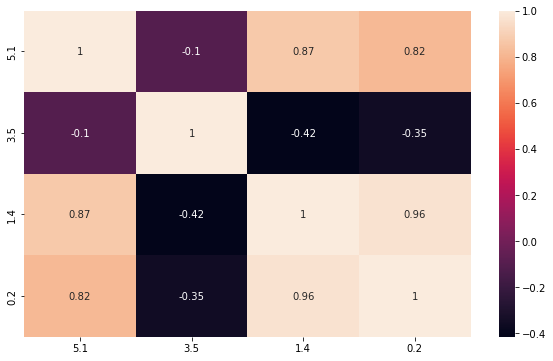

In [15]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()

plt.subplots(figsize=(10, 6))
sns.heatmap(corr, annot=True)

In [16]:
from sklearn.preprocessing import LabelEncoder


In [20]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

le = LabelEncoder()
y = le.fit_transform(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<Figure size 432x288 with 0 Axes>

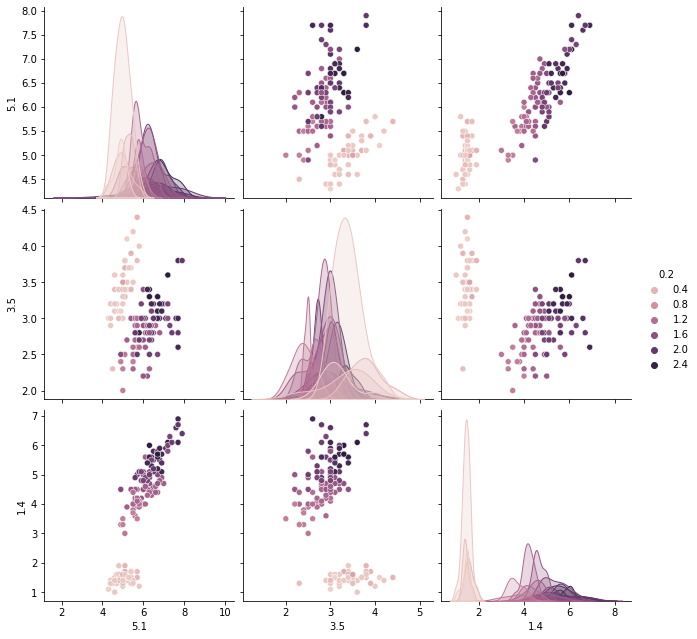

In [26]:
plt.figure()
sns.pairplot(df, hue="0.2", height=3)
plt.show()

In [28]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)

In [29]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
y_pred = classifier.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred) * 100
print('Accuracy: ' + str(round(accuracy, 2)) + '%')

Accuracy: 93.33%
